<a href="https://colab.research.google.com/github/MUSA-650/MUSA-650_Spring2024/blob/master/Week09/ImgConv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Simple convolutional filter implementation

In [53]:
import sys
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
## Function to convolve a 2D image with a predefined filter (kernel)
def conv2D(img, kernel_size):

    # Get shape of image and kernel
    xK, yK = kernel.shape
    xhK = int(np.ceil(xK / 2))        ## Half size for kernel
    yhK = int(np.ceil(yK / 2))        ## Half size for kernel

    xI, yI = img.shape

    # Get shape of output img
    xOut = int(((xI - xK) / strides) + 1)
    yOut = int(((yI - yK) / strides) + 1)
    outImg = np.zeros([xOut, yOut])

    # Convolve image with the kernel
    for i,x in enumerate(np.arange(xhK, xI-xhK, strides)):
        for j,y in enumerate(np.arange(yhK, yI-yhK, strides)):
            imgMat = img[ x-xhK+1 : x+xhK, y-yhK+1 : y+yhK ]
            outImg[i, j] = (kernel * imgMat).sum()

    return outImg


In [89]:
## Function to convolve a 2D image with a predefined filter (kernel)
def maxpool2D(img, kernel_size):

    kernel = np.ones([kernel_size, kernel_size])
    kernel = np.ones([kernel_size, kernel_size])*(-5)
    strides = kernel_size

    # Get shape of image and kernel
    xK, yK = kernel.shape
    xhK = int(np.ceil(xK / 2))        ## Half size for kernel
    yhK = int(np.ceil(yK / 2))        ## Half size for kernel

    xI, yI = img.shape

    # Get shape of output img
    xOut = int(((xI - xK) / strides) + 1)
    yOut = int(((yI - yK) / strides) + 1)
    outImg = np.zeros([xOut, yOut])

    # Convolve image with the kernel
    for i,x in enumerate(np.arange(xhK, xI-xhK, strides)):
        for j,y in enumerate(np.arange(yhK, yI-yhK, strides)):
            imgMat = img[ x-xhK+1 : x+xhK, y-yhK+1 : y+yhK ]
            outImg[i, j] = imgMat.max()

    return outImg


In [77]:
## Function to convolve a 2D image with a predefined filter (kernel)
def downsample2D(img, kernel_size):

    kernel = np.ones([kernel_size, kernel_size])
    strides = kernel_size

    # Get shape of image and kernel
    xK, yK = kernel.shape
    xhK = int(np.ceil(xK / 2))        ## Half size for kernel
    yhK = int(np.ceil(yK / 2))        ## Half size for kernel

    xI, yI = img.shape

    # Get shape of output img
    xOut = int(((xI - xK) / strides) + 1)
    yOut = int(((yI - yK) / strides) + 1)
    outImg = np.zeros([xOut, yOut])

    # Convolve image with the kernel
    for i,x in enumerate(np.arange(xhK, xI-xhK, strides)):
        for j,y in enumerate(np.arange(yhK, yI-yhK, strides)):
            imgMat = img[ x-xhK+1 : x+xhK, y-yhK+1 : y+yhK ]
            outImg[i, j] = imgMat.mean()

    return outImg


In [58]:
##############################
## Define args
indir = '/content/drive/MyDrive/CommonFiles/MUSA650-Data'
imgName = indir + '/upenn1.png'
#imgName = indir + '/Lenna.png'
#kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
kernel = np.array([[-1, -1, -1], [1, 1, 1], [-1, -1, -1]])
#kernel = np.ones([13,13])/169
#kernel = np.ones([33,33])/(33*33)
#kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
#kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]).T

In [59]:
## Read img
img = io.imread(imgName, as_gray=True)

In [60]:
## Increase contrast
#img = (img - 0.15)/0.85
#img[img<0]=0
#img[img>1]=1

In [68]:
## Apply convolution
#imgC = convolve2D(img, kernel, padding=1, strides = 5)
kernel = np.ones([5,5])/25
imgC = conv2D(img, kernel, strides = 1)

In [95]:
## Apply maxpool
imgM = maxpool2D(img, 100)

In [96]:
## Apply downsample
imgD = downsample2D(img, 100)

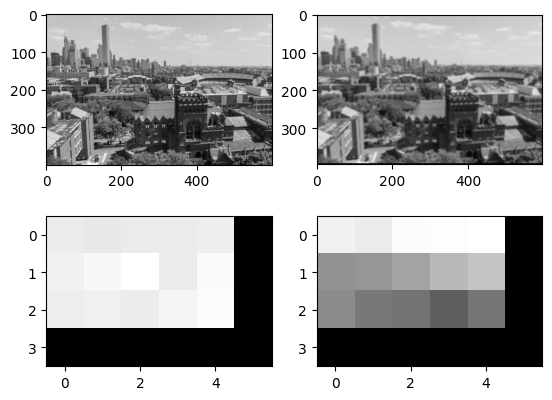

In [97]:
## Show img
#f, ax = plt.subplots(2, 2, figsize=(24, 20))
f, ax = plt.subplots(2, 2)
ax[0,0].imshow(img, cmap='gray')
ax[0,1].imshow(imgC, cmap='gray')
ax[1,0].imshow(imgM, cmap='gray')
ax[1,1].imshow(imgD, cmap='gray')
plt.show()
